# Processamento de dados do arquivo googleplaystore.csv

# Verificando o dataset

In [ ]:
import pandas as pd

arquivo = "googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo, sep = ",")

# print(df)

# Visualizacao dos dados para ver se tem inconsistencias

print(df['Category'].unique(),'\n')

print(df['Reviews'].unique(),'\n')

print(df['Size'].unique(),'\n')

print(df['Installs'].unique(), '\n')

print(df['Type'].unique(),'\n')

print(df['Content Rating'].unique(),'\n')

print(df['Genres'].unique(),'\n')

print(df['Last Updated'].unique(),'\n')

print(df['Current Ver'].unique(),'\n')

print(df['Android Ver'].unique(),'\n')

# Aplicativo com coluna deslocada

print(df.sort_values(by = 'Category'))

app = df.sort_values(by = 'Category')

app.head(1)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9'] 

['159' '967' '87510' ... '603' '1195' '398307'] 

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## Retirando linhas duplicadas com o Pandas e tratamento de dados

In [ ]:
import pandas as pd
import numpy as np
import csv

arquivo = "googleplaystore.csv"
arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo, sep = ",")

# Removendo Aplicativos duplicados baseado no maior número de reviews

df = df.sort_values(by = 'Reviews', ascending = False).drop_duplicates(subset = 'App')

df = df.drop(df[(df.App == 'Life Made WI-Fi Touchscreen Photo Frame')].index)

# Tratando valores NaN

df['Reviews'] = df['Reviews'].replace(to_replace = np.nan, value = 'Sem Avaliacao')

df['Type'] = df['Type'].replace(to_replace = np.nan, value = 'NA')

df['Content Rating'] = df['Content Rating'].replace(to_replace = np.nan, value = 'Unrated')

df['Android Ver'] = df['Android Ver'].replace(to_replace = np.nan, value = 'NA')

df.to_csv(arquivo_novo, index = False, quoting=csv.QUOTE_MINIMAL)


## Criando gráfico de barras com os 5 apps com os maiores números de instalação

Text(0, 0.5, 'Instalacoes')

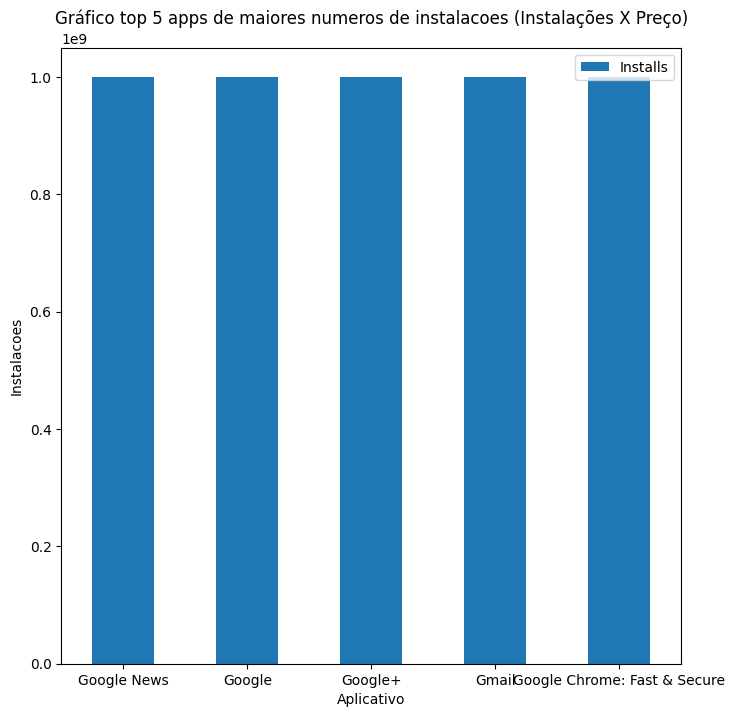

In [ ]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Funcoes para retirar o + e a , para que consiga transformar em numeros e depois fazer uma ordenacao a partir deles

df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].str.replace(',', '')

df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Ordenacao decrescente do dataframe

df = df.sort_values(by = 'Installs', ascending = False)

# Pega os 5 maiores valores, pois ocorreu a ordenacao

df = df.head(5)

# Grafico de barras pelo pandas

grafico = df.plot.bar(x='App', y='Installs', rot=0, figsize = (8,8))

grafico.set_title('Gráfico top 5 apps de maiores numeros de instalacoes (Instalações X Preço)')
grafico.set_xlabel('Aplicativo')
grafico.set_ylabel('Instalacoes')


## Gráfico pizza (pie chart) de acordo com as categorias dos aplicativos

<Axes: >

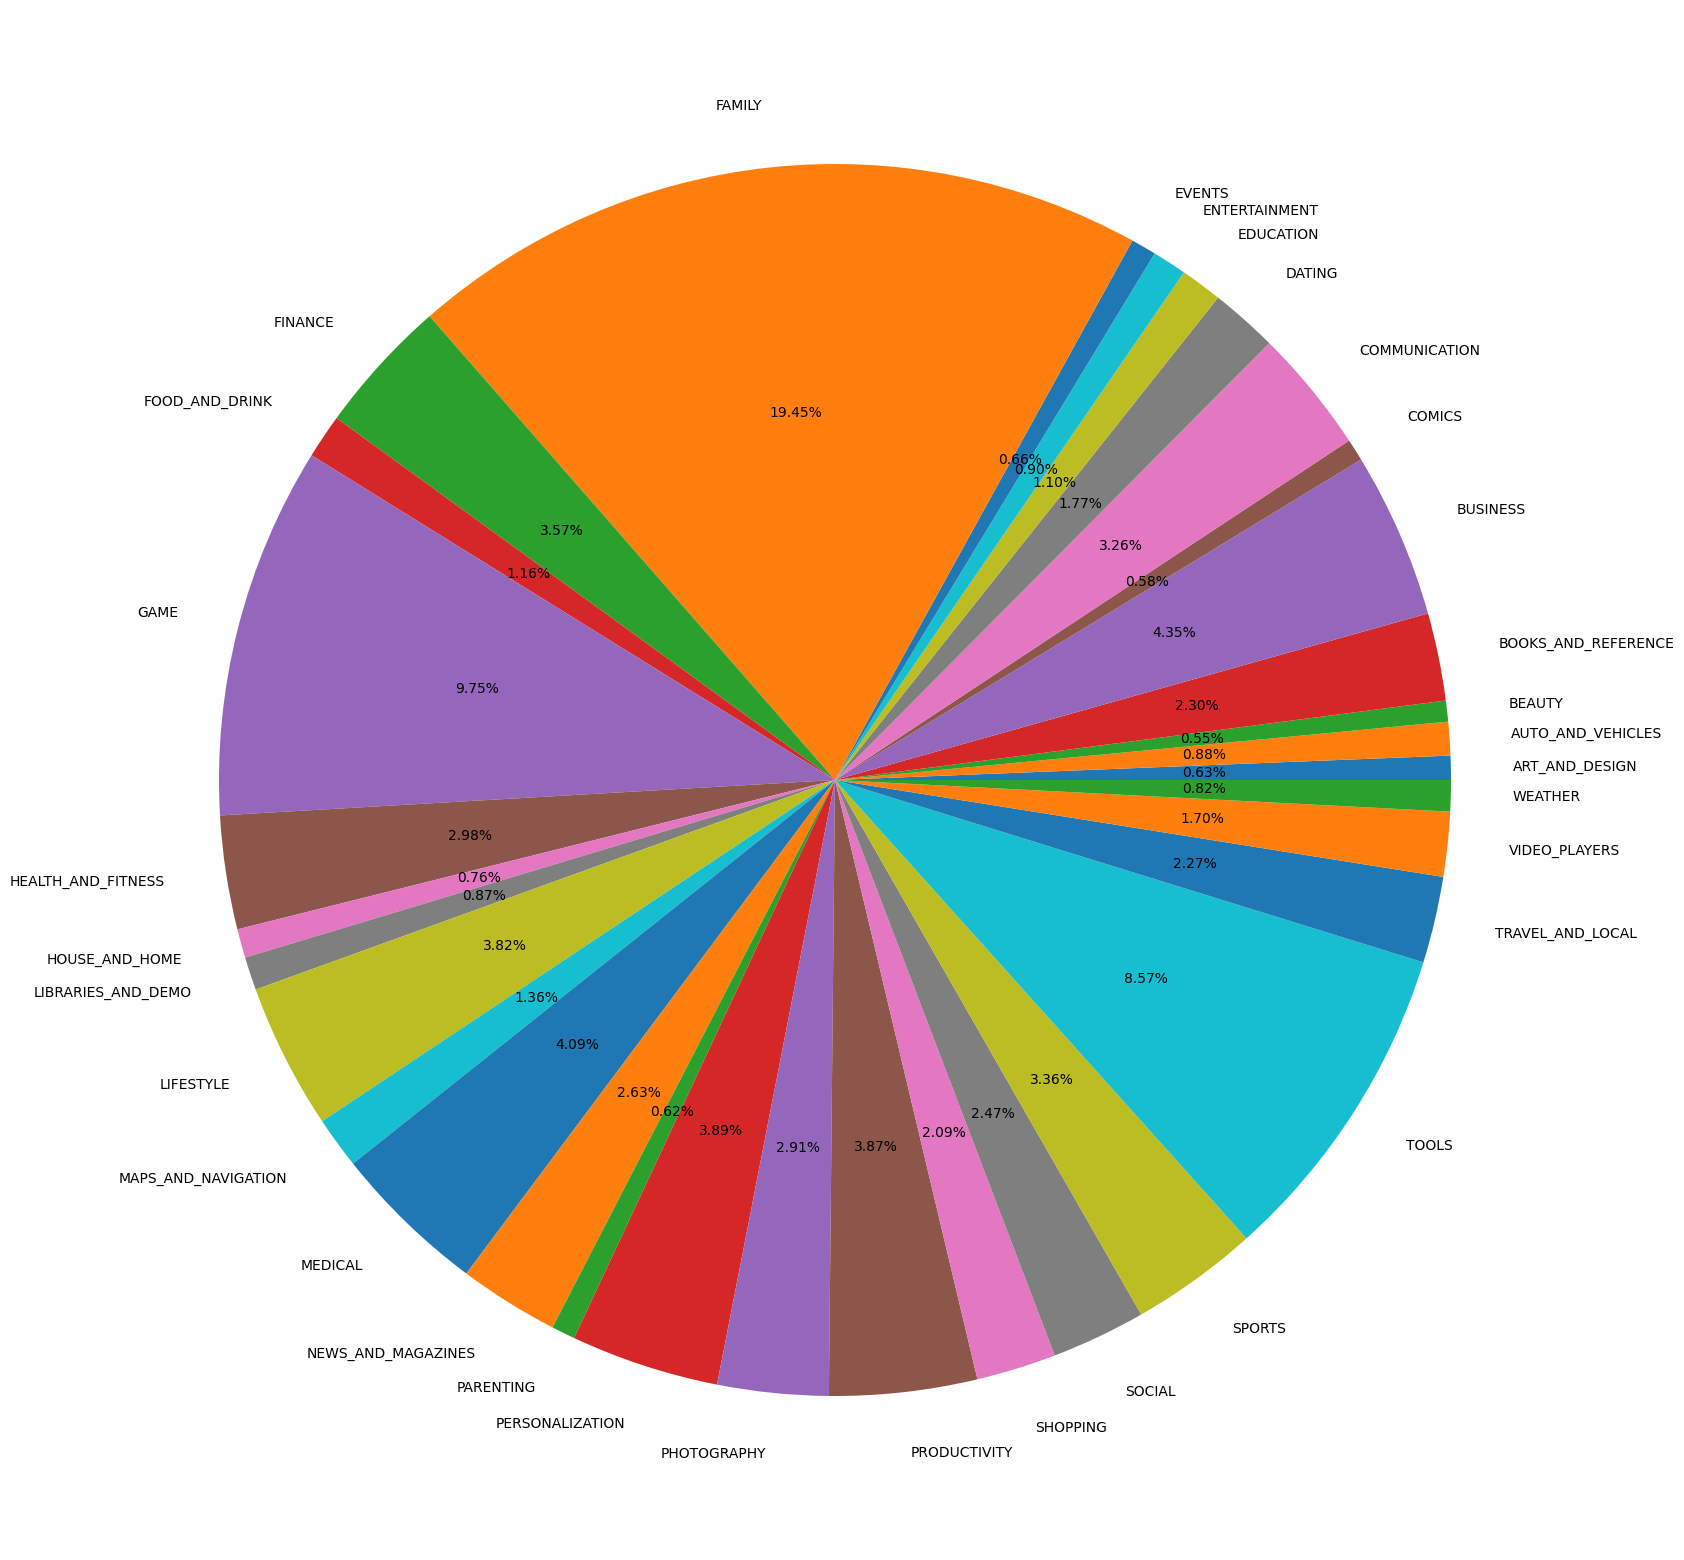

In [ ]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Agrupando pelas categorias

df = df.groupby(['Category']).size()

# Grafico do tipo "pie chart" colocando duas casas apos a virgula

df.plot.pie(autopct="%.2f%%",figsize=(20,20))

## Aplicativo mais caro da Google Play Store

In [ ]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Retirando o simbolo do cifrao para que se consiga fazer a ordenacao

df['Price'] = df['Price'].str.replace('$', '')

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Ordenacao decrescente pelo preco

df = df.sort_values(by = 'Price', ascending = False)

df['Price'] = '$' + df['Price'].astype(str)

df.head(1)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4950,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,$400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


# Quantidade de aplicativos com Mature 17+

In [ ]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# print que consiste em imprimir a quantidade de aplicativos Mature 17+ para isso é criado um dataframe que vai ter so essas linhas que contem Mature 17+ e com o len é contabilizado as linhas desse dataframe

print('Número de aplicativos com Mature 17+:', len(df[df['Content Rating'] == 'Mature 17+']))

Número de aplicativos com Mature 17+: 393


# Top 10 aplicativos por número de reviews

In [ ]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Transforma em numeros os reviews para que se consiga fazer a ordenacao

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Ordenacao decrescente pela coluna Reviews

df = df.sort_values(by = 'Reviews', ascending = False)

# Apresenta os 10 valores ja ordenado, ou seja, os 10 apps com a maior quantidade de reviews

df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
878,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
1357,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
1486,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2100,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
2971,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
3106,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
4928,Subway Surfers,GAME,4.5,27725352,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
5190,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
5326,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
5572,Clash Royale,GAME,4.6,23136735,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up


# Arquivo mais pesado da Google Play Store (Lista)

In [ ]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# É somente retirado o M de Mega(bytes), porque nao ha valores G de Giga(bytes), ou maiores

df['Size'] = df['Size'].str.replace('M', '')

df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Ordenacao decrescente pela coluna Size

df = df.sort_values(by = 'Size', ascending = False)

# É colocado novamente o M para visualizacao correta do Mega, vale ressaltar que esse valor é colocado em todas da coluna

df['Size'] = df['Size'].astype(str) + 'M'

# Apresenta o primeiro valor pos ordenacao

df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5217,Miami crime simulator,GAME,4.0,254518,100.0M,"10,000,000+",Free,0,Mature 17+,Action,"July 9, 2018",2.0,4.0 and up


# Arquivo mais leve da Google Play Store (Valor)

In [ ]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Nesse caso é retirado o k, por nao haver valores com bytes se fosse retirado o M o valor iria se misturar com os valores que contem o k, assim so foi feito para os valores que contem k

df['Size'] = df['Size'].str.replace('k', '')

df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Ordenacao crescente pela coluna size

df = df.sort_values(by = 'Size', ascending = True)

# Volta o valor k, também vale lembrar que esse valor é colocado em todas da coluna

df['Size'] = df['Size'].astype(str) + 'k'

# Apresenta o arquivo mais leve, porem somente seu valor com a funcao iloc

print('Tamanho do arquivo mais leve:', df.iloc[0, 4])

Tamanho do arquivo mais leve: 8.5k


# Arquivo com menos reviews Google Play Store (Valor)

In [ ]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Ordenacao crescente pela coluna Reviews

df = df.sort_values(by = 'Reviews', ascending = True)

df['Reviews'] = df['Reviews'].astype(str)

# Imprime o menor valor de review

print('Número de reviews mais baixo da Google Play Store:', df.iloc[0, 3])

Número de reviews mais baixo da Google Play Store: 0


# Top 10 apps de esportes mais caros

In [ ]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Retira o simbolo do cifrao

df['Price'] = df['Price'].str.replace('$', '')

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Pega somente as linhas que contem o sports na coluna category

df_sports = df[df['Category'] == 'SPORTS']

# Ordem decrescente pela coluna Price

df = df_sports.sort_values(by = 'Price', ascending = False)

# Imprime somente as 10 primeira linhas

df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4046,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,25M,"50,000+",Paid,29.99,Everyone,Sports,"July 11, 2018",4.18.0,4.1 and up
8265,Football Manager Mobile 2018,SPORTS,3.9,11460,Varies with device,"100,000+",Paid,8.99,Everyone,Sports,"June 27, 2018",Varies with device,4.1 and up
1544,Absolute RC Heli Simulator,SPORTS,3.9,654,50M,"10,000+",Paid,4.99,Everyone,Sports,"December 20, 2017",3.29,4.1 and up
4587,BT Speed,SPORTS,NaN,3,948k,10+,Paid,4.80,Everyone,Sports,"May 21, 2015",1.0.1,4.0.3 and up
2200,iHunter BC,SPORTS,4.4,55,63M,"1,000+",Paid,4.49,Everyone,Sports,"August 3, 2018",2.0.38,4.0.3 and up
5314,iFish BC,SPORTS,3.6,25,6.0M,"1,000+",Paid,3.99,Everyone,Sports,"February 18, 2015",2.1,2.3 and up
5275,Mike V: Skateboard Party PRO,SPORTS,4.2,2506,Varies with device,"50,000+",Paid,3.99,Everyone,Sports,"January 23, 2017",Varies with device,Varies with device
8753,G-Force Driving Assistant,SPORTS,4.6,10,6.1M,100+,Paid,3.88,Everyone,Sports,"April 10, 2013",1.0,2.3.3 and up
1317,Jetting for Honda CR dirt bike,SPORTS,4.1,7,3.4M,100+,Paid,3.49,Everyone,Sports,"April 13, 2016",2.2,3.0 and up
1870,O'Route Orienteering,SPORTS,4.2,6,1.3M,100+,Paid,3.02,Everyone,Sports,"December 27, 2017",2.0.5,3.0 and up


# Quantidade de aplicativos por preço

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Retira o simbolo do cifrao

df['Price'] = df['Price'].str.replace('$', '')

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Ordenacao decrescente dos valores

df = df.sort_values(by = 'Price', ascending = False)

# Criacao de intervalos para melhor visualizacao da tabela

intervalo = [0, 5, 10, 15, 20, 30, 40, 50, 100, 200, 300, 400, 500]

intervalo_visual = ['0 - 5', '5 - 10','10 - 15', '15 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 100', '100 - 200', '200 - 300', '300 - 400', '400 - 500']

# Criacao de um novo dataframe

df_intervalo = df

# Utilizacao da funcao cut para colocar em intervalos que foi criado anteriormente

df_intervalo['Intervalo'] = pd.cut(df['Price'], bins = intervalo, labels = intervalo_visual, include_lowest = True)

# Quantidade de elementos a partir dos intervalos

df_intervalo = df_intervalo['Intervalo'].value_counts().sort_index().reset_index()

# Criacao das colunas para a visualizacao da tabela

df_intervalo.columns = ['Intervalo (USD)', 'Quantidade']

print(df_intervalo)

# fig, ax = plt.subplots()

# colors = np.array([cor for cor in range(0,100,10)])

# ax.scatter(reviews, price, c=colors, cmap='plasma')

# ax.set(xlim=(0, 6), xticks=np.arange(0, 6),
#        ylim=(0, 31), yticks=np.arange(0, 31))

# ax.set_title('Gráfico top 10 apps de esportes (Instalações X Preço)')
# ax.set_xlabel('Número de instalações')
# ax.set_ylabel('Preço (dólar)')

# plt.show()

   Intervalo (USD)  Quantidade
0            0 - 5        9500
1           5 - 10          85
2          10 - 15          21
3          15 - 20          14
4          20 - 30          10
5          30 - 40           5
6          40 - 50           1
7         50 - 100           3
8        100 - 200           3
9        200 - 300           1
10       300 - 400          16
11       400 - 500           0


# Quantidade por Content Rating (Lista)

In [ ]:
import pandas as pd

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Ordenacao decrescente pela coluna Content Rating

df = df.sort_values(by = 'Content Rating', ascending = False)

# Contagem das linhas repetidas pela coluna Content Rating

df = df['Content Rating'].value_counts().sort_index().reset_index()

# Criacao das colunas para a melhor visualizacao do grafico

df.columns = ['Content Rating', 'Quantidade']

print(df)

    Content Rating  Quantidade
0  Adults only 18+           3
1         Everyone        7903
2     Everyone 10+         322
3       Mature 17+         393
4             Teen        1036
5          Unrated           2


# Quantidade por Content Rating (Gráfico)

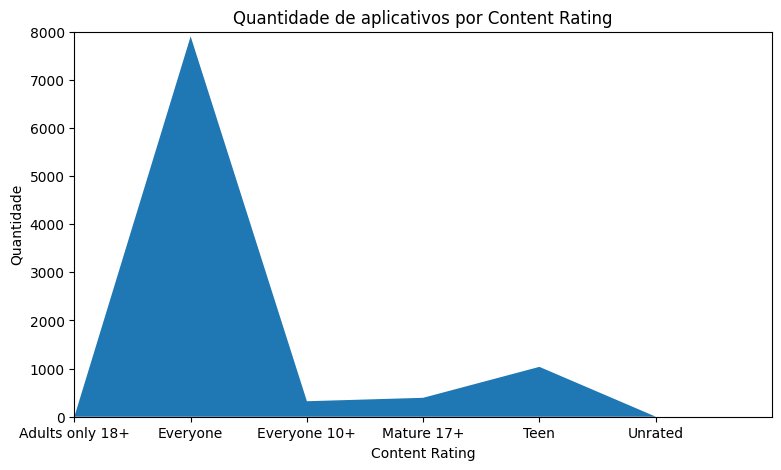

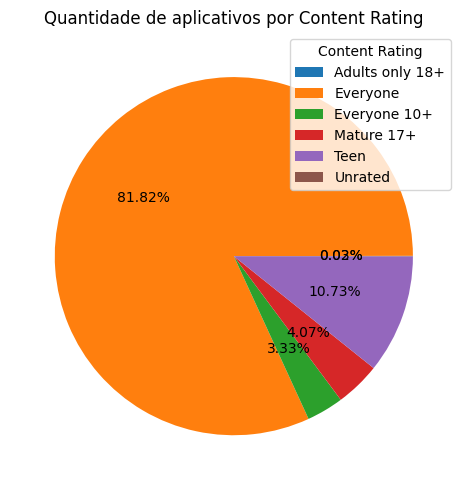

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

arquivo_novo = "novo_googleplaystore.csv"

# Leitura do CSV com o pandas

df = pd.read_csv(arquivo_novo, sep = ",")

# Ordenacao decrescente pela coluna Content Rating

df = df.sort_values(by = 'Content Rating', ascending = False)

# Contagem das linhas repetidas pela coluna Content Rating

df = df['Content Rating'].value_counts().sort_index().reset_index()

# Criacao das colunas

df.columns = ['Content Rating', 'Quantidade']

# Criacao das variaveis para a utilizacao no grafico

content_rating = df['Content Rating']

quantidade = df['Quantidade']

# Indexacao da quantidade de valores do content rating

intervalo_content = np.arange(len(content_rating))

# Criacao do grafico

fig, ax = plt.subplots(figsize = (9, 5))

# Grafico do tipo 'Stack'

ax.stackplot(content_rating, quantidade)

# Delimitacao dos limites dos eixos graficos

ax.set(xlim=(0, len(content_rating)),
       ylim=(0, 8000))

# Criacao do titulo e a identificacao dos eixos

ax.set_title('Quantidade de aplicativos por Content Rating')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Quantidade')

# Plota o grafico

plt.show()

# Criacao de um grafico do tipo Pie para a visualizacao das porcentagens dos aplicativos e suas respectivas classificacoes

fig, ax = plt.subplots(figsize = (9, 5))

ax.pie(quantidade, radius = 1, center = (0,0), autopct = '%1.2f%%', labels = None)

ax.set_title('Quantidade de aplicativos por Content Rating')

ax.legend(content_rating, title = 'Content Rating', loc = 'upper right')

plt.tight_layout()
plt.show()